# Titanic

## Introduction
This notebook is a study of the Kaggle project <a href = "https://www.kaggle.com/c/titanic">Titanic: Machine Learning from disaster</a>. The goal is to understand and to develop a general workflow of machine learning problem. 

## Workflow stages
The competition solution workflow goes through seven stages described
<ol>
  <li> Question or problem definition.</li>
  <li> Aquire training and testing data.</li>
  <li> Wrangle, prepare and clean the data.</li>
  <li> Analyze, identify patterns and explore the data.</li>
  <li> Model, predict and solve the problem.</li>
  <li> Visualize, report and present the problem solving steps and final solution.</li>
  <li> Supply and submit the result. </li>
</ol>

1, 2, 3, are actually the most important for general data analysis, but is much simplified in a Kaggle competition. For Kaggle, the emphasis becomes 4, 5, 6. In general, people talk about EDA, feature engineering, feature selection and model training, and finally ensemble all the learning models to a meta learner using stacking/boosting.

The workflow indicates general sequence of how each stage may follow the other. However there are use cases with exceptions.
<ul>
<li>We may combine mulitple workflow stages. We may analyze by visualizing data.</li>
<li>Perform a stage earlier than indicated. We may analyze data before and after wrangling.</li>
<li>Perform a stage multiple times in our workflow. Visualize stage may be used multiple times.</li>
<li>Drop a stage altogether. We may not need supply stage to productize or service enable our dataset for a competition.</li>
</ul>

## Workflow goals
The data science solutions workflow solves for seven major goals.
<ol>
<li>
**Classifying**. We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.
</li>
<li> 
**Correlating**. One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.
</li>
<li>
**Converting**. For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.
</li>
<li>
**Completing**. Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.
</li>
<li>
**Correcting**. We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.
</li>
<li>
**Creating**. Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.
</li>
<li>
**Charting**. How to select the right visualization plots and charts depending on nature of the data and the solution goals. A good start is to read the Tableau paper on <a href = "https://www.tableau.com/sites/default/files/media/which_chart_v6_final_0.pdf">Which chart or graph is right for you?</a>.
</li>
</ol>

### Import libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Acquire data

The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [2]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')
combine = [train_df, test_df]

# store passengerID for submission
PassengerId = test_df['PassengerId']

# preview the data 
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Exploratory Data Analysis (EDA)

### Analyze by describing data
Pandas also helps describe the datasets answering following questions early in our project.<br>

**Which features are available in the dataset?**

Noting the feature names for directly manipulating or analyzing these. These feature names are described on <a href = "https://www.kaggle.com/c/titanic/data">the Kaggle data page here</a>.

In [3]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

**Which features are categorical?**

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

Categorical: Survived, Sex and Embarked. Ordinal: PassengerID, Pclass.

**Which features are numerical?**

These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

Continous: Age, Fare. Discrete: SibSp, Parch.

**Which features are mixed data types?**

Numerical, alphanumeric data within same feature. These are candidates for correcting goal.

Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

**Which features are text?**

These values contain descriptions. We need to extract informaiton by dividing text into tokens and do statistics on the strings. 

Name is a text feature here. 

In [4]:
train_df.info()
print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare

**Which features may contain errors or typos?**

This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting. Usually for text features, we need to extract tokens and do frequency analysis. 

Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

**Which features contain blank, null or empty values?**

These will require correcting.
<ul>
<li> Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.</li>
<li> Cabin > Age are incomplete in case of test dataset.</li>
</ul>

I think Carbin misses too much data, may just drop it. Another option is to have a new feature, whether having Cabin information or not.

**What are the data types for various features?**

Helping us during converting goal.
<ul>
<li> Seven features are integer or floats. Six in case of test dataset.</li>
<li> Five features are strings (object).</li>
</ul>

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**What is the distribution of numerical feature values across the samples?**

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.
<ul>
<li> Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).</li>
<li> Survived is a categorical feature with 0 or 1 values. </li>
<li> Around 38.38% samples survived representative of the actual survival rate at 32%.</li>
<li> Most passengers (> 75%) did not travel with parents or children.</li>
<li> Nearly 30% of the passengers had siblings and/or spouse aboard.</li>
<li> Fares varied significantly with few passengers (< 1%) paying as high as $512. </li>
<li> Few elderly passengers (< 1%) within age range 65-80. </li>
</ul>

In [6]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


** What is the distribution of categorical features?**
<ul>
<li> Names are unique across the dataset (count=unique=891).</li>
<li> Sex variable as two possible values with 65% male (top=male, freq=577/count=891).</li>
<li> Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.</li>
<li> Embarked takes three possible values. S port used by most passengers (top=S).</li>
<li> Ticket feature has high ratio (22%) of duplicate values (unique=681).</li>
</ul>

### Assumtions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.
<ol>
<li>
**Correlating.**
We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.
</li>

<li>
**Completing.**
<ul>
<li>We may want to complete Age feature as it is definitely correlated to survival.</li>
<li>We may want to complete the Embarked feature as it may also correlate with survival or another important feature.</li>
</ul>
</li>

<li>
**Correcting.**
In other words, feature selection. In more complicated situation, we need to use algorithm to help us to select features. In this simple example, we use domain knowledge to drop features by hand. 
<ul>
<li> Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.</li>
<li> Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.</li>
<li> PassengerId may be dropped from training dataset as it does not contribute to survival.</li>
<li> Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.</li>
</ul>
</li>

<li>
**Creating.**
This is the most important step (feature engineering).
<ul>
<li>We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.</li>
<li>Engineer a feature from the above, we include a feature isAlone or not.</li>
<li>We may want to engineer the Name feature to extract Title as a new feature.</li>
<li>We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.</li>
<li>We may also want to create a Fare range feature if it helps our analysis.</li>
<li>We may include a feature whether the person has a carbin or not. 
<li> Ticket may also extract has letters and the length of number. </li>
</ul>
</li>

<li>
**Classifying.**
We may also add to our assumptions based on the problem description noted earlier.
<ul>
<li>Women (Sex=female) were more likely to have survived.</li>
<li>Children (Age<?) were more likely to have survived.</li>
<li>The upper-class passengers (Pclass=1) were more likely to have survived.</li>
</ul>
</li>
</ol>

### Analyze by pivoting features
To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex, Embarked), ordinal (Pclass) or discrete (SibSp, Parch) type.
<ul>
<li>Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.</li>
<li>Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).</li>
<li>SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).</li>
<li> The correlation of Embarked is not that obvious except that People from C has a higher mean.</li>
</ul>

Note that this is categorical/discrete vs categorical. We use groupby and mean to see the correlation. 

In [7]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [10]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [11]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


### Analyze by visualizing data
Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

**Plotting correlation above**

Let's start from plotting the correlation we explored above. To plot the mean of survived using point plot. 

In [12]:
def stacked_bar_plot(feature, axis):
    df = train_df[[feature, 'Survived']]
    df = pd.get_dummies(data = df, columns = ['Survived'])
    df = df.rename(columns = {'Survived_0': 'Not_Survive', 'Survived_1': 'Survived'})
    df.groupby([feature], as_index = False).sum().sort_values(by = 'Survived', ascending = False).plot(x = feature, kind = 'bar', stacked = True, ax = axis)
    return 

def cate_plot(feature) :
    # Pointplot the mean
    sns.factorplot(feature,'Survived', data=train_df, size = 4, aspect = 3)
    fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
    # Embarked against Survive
    stacked_bar_plot(feature, axis1)
    # Survive against Embarked
    sns.countplot(x='Survived', hue="Embarked", data=train_df, order=[1,0], ax=axis2)

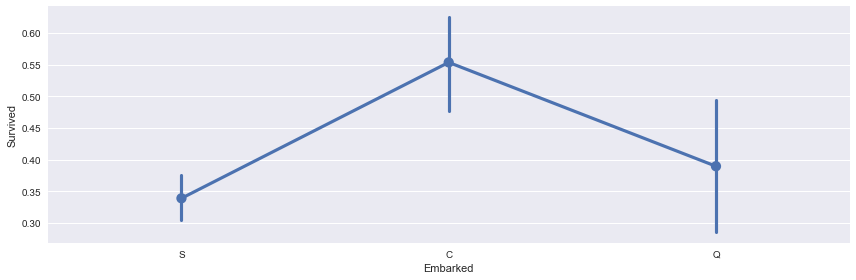

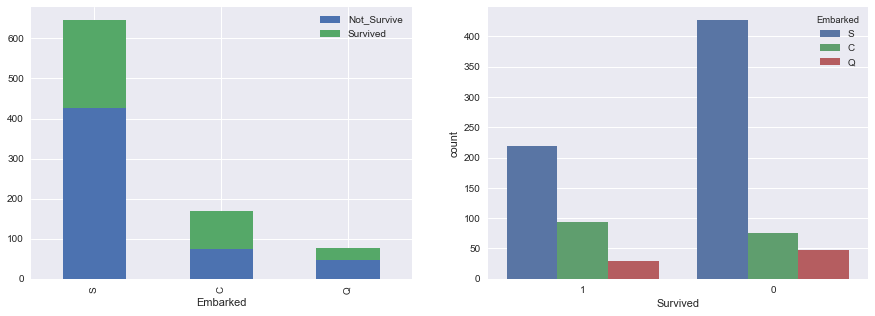

In [13]:
# Embarked

# only in train_df, fill the two missing values with the most occurred value, which is "S".
train_df["Embarked"] = train_df["Embarked"].fillna("S")

# plot
cate_plot('Embarked')

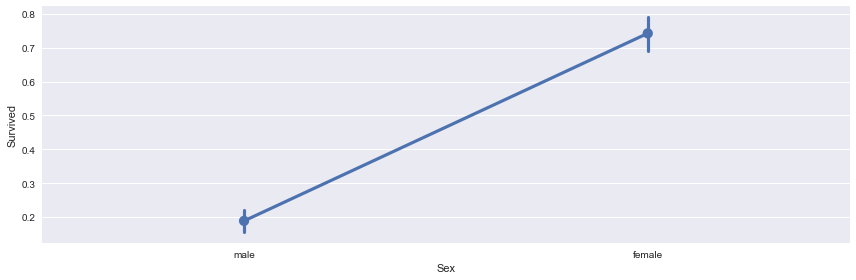

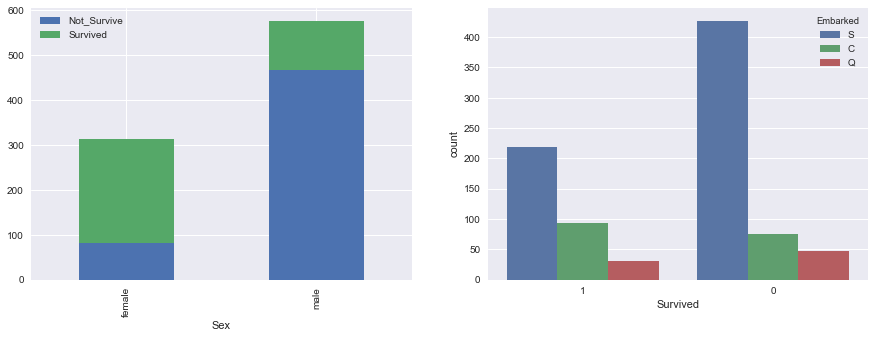

In [14]:
cate_plot('Sex')

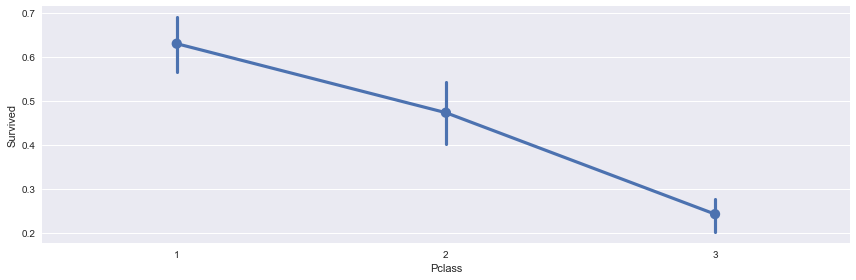

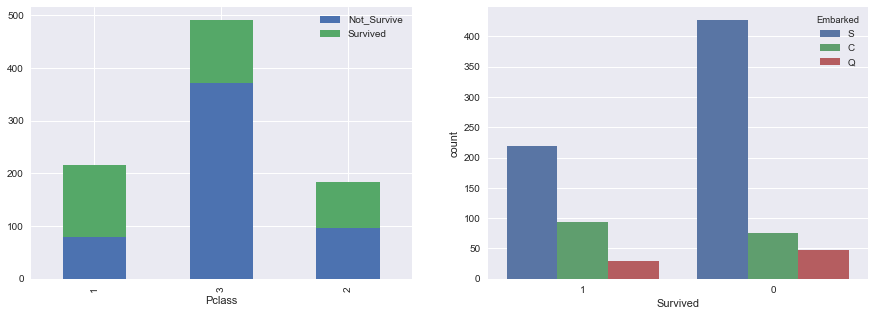

In [15]:
cate_plot('Pclass')

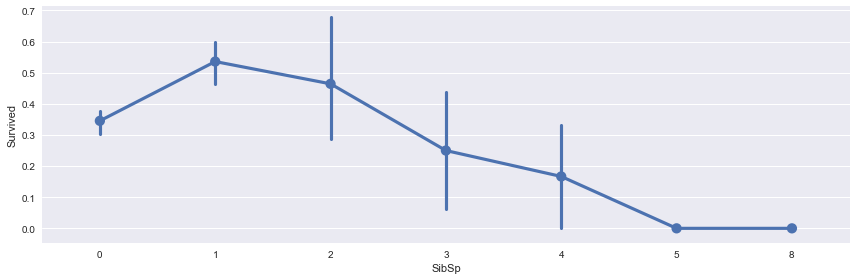

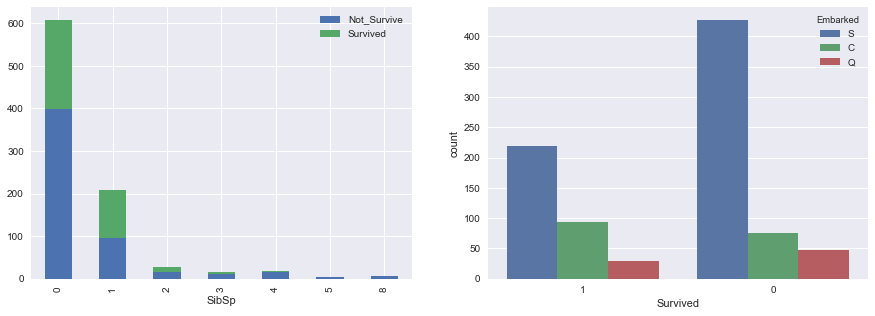

In [16]:
cate_plot('SibSp')

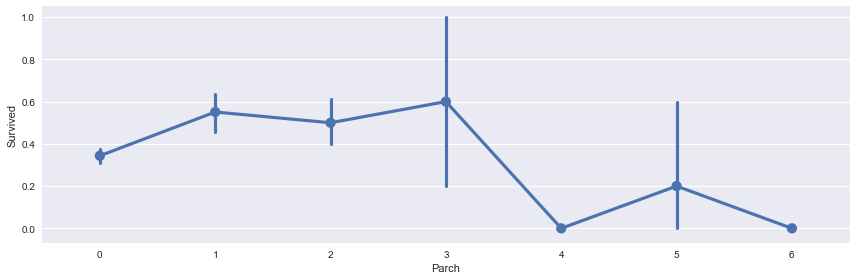

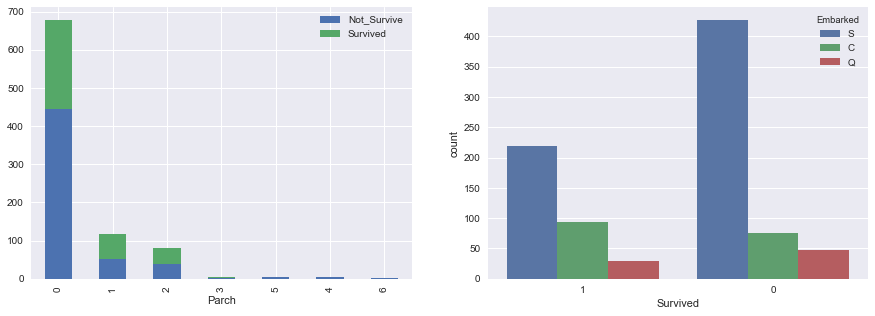

In [17]:
cate_plot('Parch')

### Correlating numerical features
Understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Note that x-axis in historgram visualizations represents the count of samples or passengers.

In [18]:
def num_plot(feature, bins = 10) :
    fig, (axis1, axis2) = plt.subplots(1,2, figsize = (12,5))
    sns.violinplot(x = 'Survived', y = feature, data = train_df, ax = axis1)
    sns.pointplot(x = 'Survived', y = feature, data = train_df, ax = axis2)
    g = sns.FacetGrid(train_df, col='Survived', size = 5)
    g.map(plt.hist, feature, bins=bins)

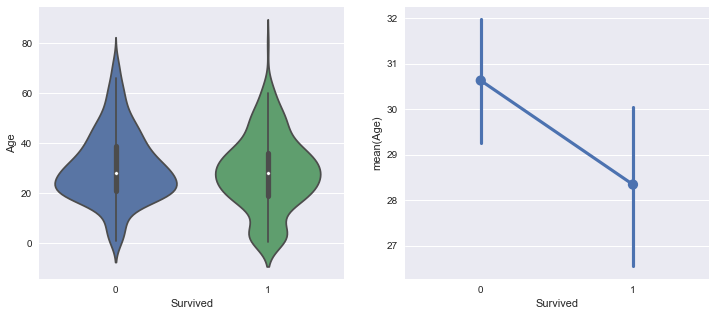

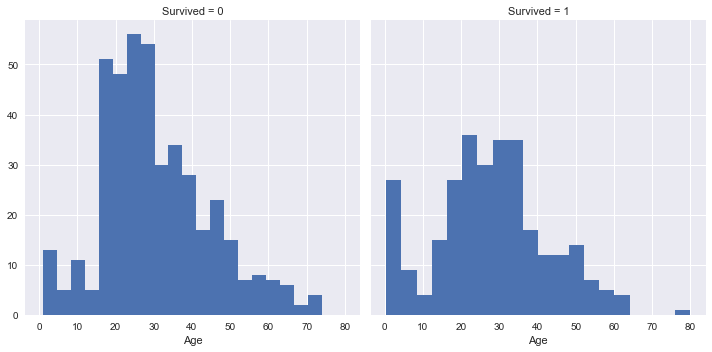

In [19]:
# Age
num_plot('Age', 20)

**Observations.**
<ul>
<li> Infants (Age <=4) had high survival rate.</li>
<li> Oldest passengers (Age = 80) survived.</li>
<li> Large number of 15-25 year olds did not survive.</li>
<li> Most passengers are in 15-35 age range.</li>
</ul>

**Decisions.**

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.
<ul>
<li>We should consider Age (our assumption classifying #2) in our model training.</li>
<li>Complete the Age feature for null values (completing #1).</li>
<li>We should band age groups (creating #4).</li>
</ul>

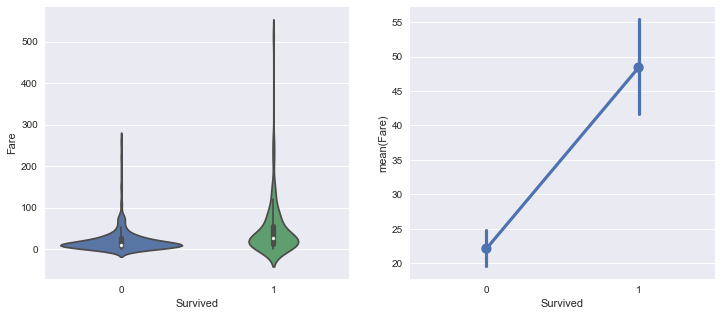

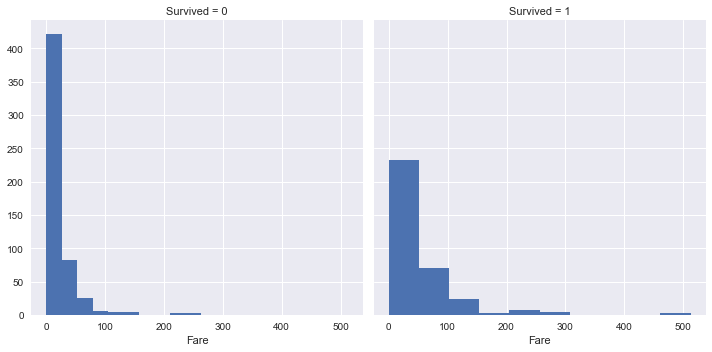

In [20]:
# Fare
num_plot('Fare')

**Observations.**
<ul>
<li> Small Fare has low survival rate.</li>
<li> Those survived tend to have higher fare.</li>
<li> Most fare are below 50. The data is very skewed.</li>
</ul>

**Decisions.**

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.
<ul>
<li>We should consider Fare.</li>
<li>We should band Fare (creating #5).</li>
</ul>

### Correlating numerical and ordinal features

We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

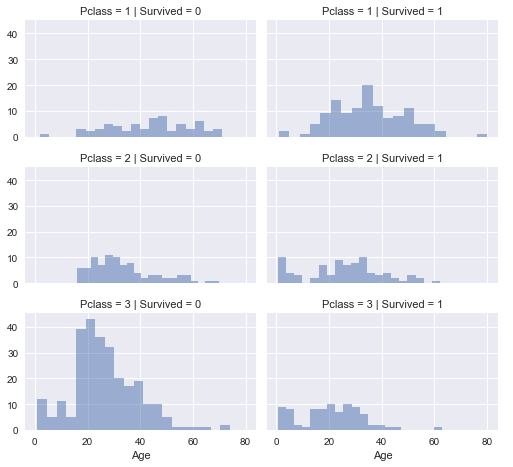

In [21]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**Observations.**
<ul>
<li> Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.</li>
<li> Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.</li>
<li> Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.</li>
<li> Pclass varies in terms of Age distribution of passengers.</li>
</ul>
**Decisions.**
<ul>
<li>Consider Pclass for model training.</li>
</ul>

### Correlating categorical features

Now we can correlate categorical features with our solution goal.

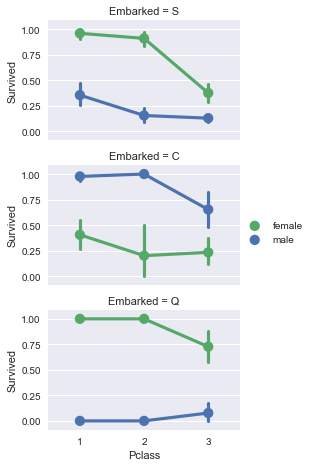

In [22]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

**Observations.**
<ul>
<li>Female passengers had much better survival rate than males. Confirms classifying (#1).</li>
<li>Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.</li>
<li>Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).</li>
<li>Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).</li>
</ul>
**Decisions.**
<ul>
<li>Add Sex feature to model training.</li>
<li>Complete and add Embarked feature to model training.</li>
</ul>

### Correlating categorical and numerical features

We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).

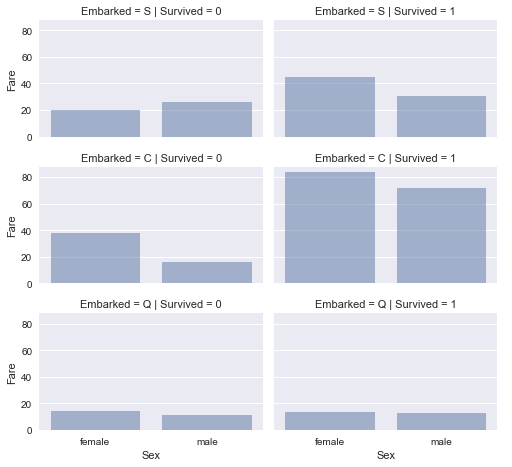

In [23]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

** Observations.**
<ul>
<li> Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.</li>
<li> Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).</li>
</ul>
**Decisions.**
<ul>
<li>Consider banding Fare feature.</li>
</ul>

### Wrangle data

We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

In [24]:
# Cabin
type(train_df.loc[1, 'Cabin'])

train_df['Has_Cabin'] = train_df['Cabin'].apply(lambda x : 0 if pd.isnull(x) else 1)
train_df[['Has_Cabin', 'Survived']].groupby('Has_Cabin', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Has_Cabin,Survived
1,1,0.666667
0,0,0.299854


** Decisions.**
<ul>
<li>Include Has_Cabin as a new feature</li>
</ul>

In [25]:
test_df['Has_Cabin'] = test_df['Cabin'].apply(lambda x : 0 if pd.isnull(x) else 1)

In [26]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

('Before', (891, 13), (418, 12), (891, 13), (418, 12))


('After', (891, 12), (418, 11), (891, 12), (418, 11))

In [27]:
#Ticket
type(train_df.loc[0, 'Ticket'])

def extract(ticket) :
    if ticket is None:
        return 0,0
    l = ticket.split(' ')
    has_slash = l[0].find('/')
    length = 0
    if (len(l) > 0) :
        try:
            length = len(l[1])
        except IndexError:
            length = 0
    return has_slash, length

extract('STON/O2. 3101282') 

(4, 7)

In [28]:
train_df['Has_slash'] = train_df['Ticket'].apply(lambda x : extract(x)[0])
train_df['Ticket_len'] = train_df['Ticket'].apply(lambda x : extract(x)[1])
train_df[['Has_slash', 'Survived']].groupby('Has_slash', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Has_slash,Survived
0,-1,0.399748
4,4,0.384615
2,2,0.370370
5,5,0.117647
1,1,0.111111
3,3,0.000000


In [29]:
train_df[['Ticket_len', 'Survived']].groupby('Ticket_len', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Ticket_len,Survived
5,5,0.508621
3,3,0.500000
2,2,0.416667
0,0,0.383459
6,6,0.250000
4,4,0.235294
7,7,0.187500
1,1,0.000000


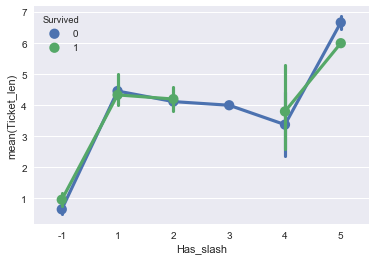

In [30]:
g = sns.pointplot(x="Has_slash", y="Ticket_len", hue = 'Survived', data=train_df)

** Decisions.**
<ul>
<li>Include Has_slash and Ticket_len as features.</li>
</ul>

In [31]:
test_df['Has_slash'] = test_df['Ticket'].apply(lambda x : extract(x)[0])
test_df['Ticket_len'] = test_df['Ticket'].apply(lambda x : extract(x)[1])

print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

('Before', (891, 14), (418, 13), (891, 14), (418, 13))


('After', (891, 13), (418, 12), (891, 13), (418, 12))

In [32]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [33]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [34]:
# We can convert the categorical titles to ordinal.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,1,5,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,-1,5,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,4,7,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,-1,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,-1,0,1


In [35]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name', 'PassengerId'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 12), (418, 11))

### Converting a categorical feature

Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.
Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [36]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title
0,0,3,0,22.0,1,0,7.2500,S,0,1,5,1
1,1,1,1,38.0,1,0,71.2833,C,1,-1,5,3
2,1,3,1,26.0,0,0,7.9250,S,0,4,7,2
3,1,1,1,35.0,1,0,53.1000,S,1,-1,0,3
4,0,3,0,35.0,0,0,8.0500,S,0,-1,0,1


### Converting categorical feature to numeric

We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [37]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title
0,0,3,0,22.0,1,0,7.2500,0,0,1,5,1
1,1,1,1,38.0,1,0,71.2833,1,1,-1,5,3
2,1,3,1,26.0,0,0,7.9250,0,0,4,7,2
3,1,1,1,35.0,1,0,53.1000,0,1,-1,0,3
4,0,3,0,35.0,0,0,8.0500,0,0,-1,0,1


### Completing a numerical continuous feature

Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.
<ol>
<li> A simple way is to generate random numbers between mean and [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation).</li>

<li> More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using [median](https://en.wikipedia.org/wiki/Median) values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...</li>

<li> Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.</li>
</ol>
Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

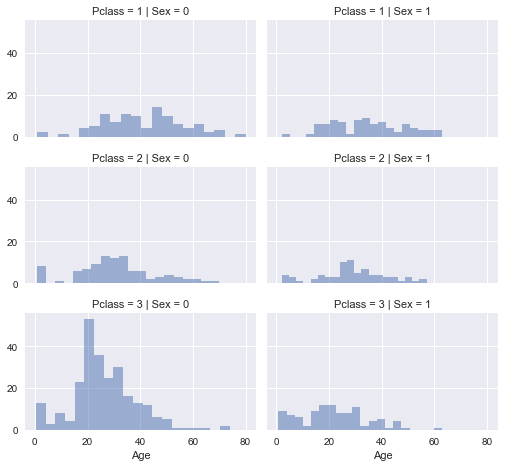

In [38]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.
In [24]:


In [39]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [40]:
for dataset in combine :
    for i in range(0, 2) :
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j + 1)]['Age'].dropna()
            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            age_guess = guess_df.median()
            
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            dataset.loc[(dataset['Age'].isnull()) & (dataset['Sex'] == i) & (dataset['Pclass'] == j + 1), 'Age'] \
            = guess_ages[i, j]
    dataset['Age'] = dataset['Age'].astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title
0,0,3,0,22,1,0,7.2500,0,0,1,5,1
1,1,1,1,38,1,0,71.2833,1,1,-1,5,3
2,1,3,1,26,0,0,7.9250,0,0,4,7,2
3,1,1,1,35,1,0,53.1000,0,1,-1,0,3
4,0,3,0,35,0,0,8.0500,0,0,-1,0,1


Let us create Age bands and determine correlations with Survived.

In [41]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'],\
                                          as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16]",0.550000
1,"(16, 32]",0.337374
2,"(32, 48]",0.412037
3,"(48, 64]",0.434783
4,"(64, 80]",0.090909


Let us replace Age with ordinals based on these bands.

In [42]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    dataset['Age'] = dataset['Age'].astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,AgeBand
0,0,3,0,1,1,0,7.2500,0,0,1,5,1,"(16, 32]"
1,1,1,1,2,1,0,71.2833,1,1,-1,5,3,"(32, 48]"
2,1,3,1,1,0,0,7.9250,0,0,4,7,2,"(16, 32]"
3,1,1,1,2,1,0,53.1000,0,1,-1,0,3,"(32, 48]"
4,0,3,0,2,0,0,8.0500,0,0,-1,0,1,"(32, 48]"


In [43]:
train_df = train_df.drop(['AgeBand'], axis = 1)

In [44]:
train_df.shape, test_df.shape

((891, 12), (418, 11))

In [45]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title
0,0,3,0,1,1,0,7.2500,0,0,1,5,1
1,1,1,1,2,1,0,71.2833,1,1,-1,5,3
2,1,3,1,1,0,0,7.9250,0,0,4,7,2
3,1,1,1,2,1,0,53.1000,0,1,-1,0,3
4,0,3,0,2,0,0,8.0500,0,0,-1,0,1


In [46]:
combine = [train_df, test_df]

### Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [47]:
for dataset in combine :
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone.

In [48]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp.

In [49]:
train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,FamilySize,IsAlone
0,0,3,0,1,7.2500,0,0,1,5,1,2,0
1,1,1,1,2,71.2833,1,1,-1,5,3,2,0
2,1,3,1,1,7.9250,0,0,4,7,2,1,1
3,1,1,1,2,53.1000,0,1,-1,0,3,2,0
4,0,3,0,2,8.0500,0,0,-1,0,1,1,1


We can also create an artificial feature combining Pclass and Age.

In [50]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Quick completing and converting a numeric feature

We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.

We may also want round off the fare to two decimals as it represents currency.

In [51]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,FamilySize,IsAlone,Age*Class
0,3,0,2,7.8292,2,0,-1,0,1,1,1,6
1,3,1,2,7.0000,0,0,-1,0,3,2,0,6
2,2,0,3,9.6875,2,0,-1,0,1,1,1,6
3,3,0,1,8.6625,0,0,-1,0,1,1,1,3
4,3,1,1,12.2875,0,0,-1,0,3,3,0,3


We can not create FareBand.

In [52]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'],\
                                           as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"[0, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31]",0.454955
3,"(31, 512.329]",0.581081


Convert the Fare feature to ordinal values based on the FareBand.

In [53]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,FamilySize,IsAlone,Age*Class
0,0,3,0,1,0,0,0,1,5,1,2,0,3
1,1,1,1,2,3,1,1,-1,5,3,2,0,2
2,1,3,1,1,1,0,0,4,7,2,1,1,3
3,1,1,1,2,3,0,1,-1,0,3,2,0,2
4,0,3,0,2,1,0,0,-1,0,1,1,1,6


### Correlation between pair of data

This is to see if we can engineer new features.

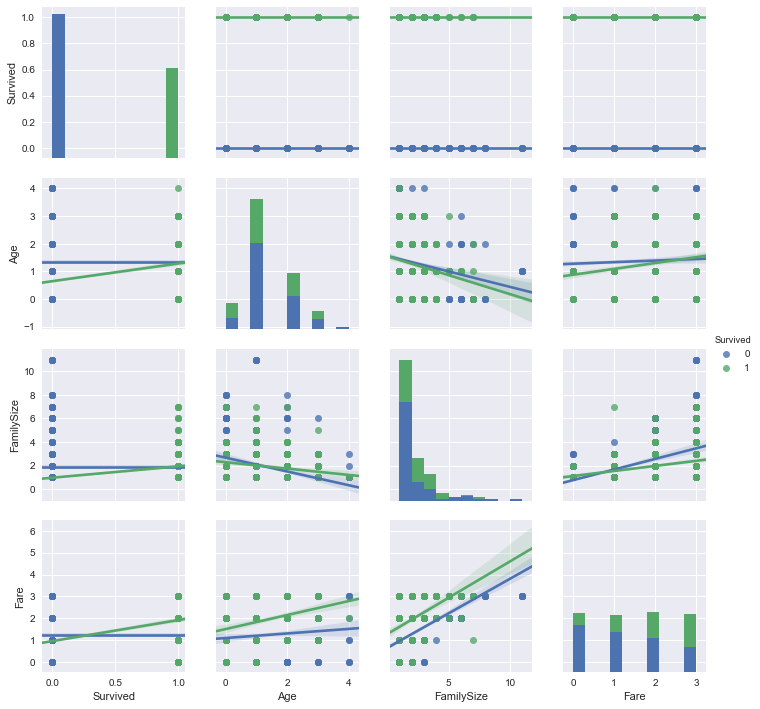

In [54]:
sns.pairplot(data = train_df[['Survived', 'Age', 'FamilySize', 'Fare']], kind = 'reg', hue = 'Survived')

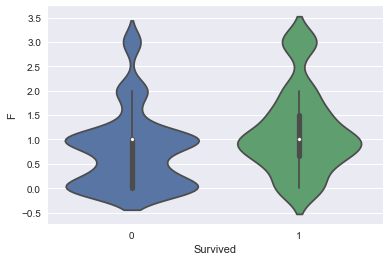

In [55]:
for df in combine:
    df['F'] = df['Fare']/(df['FamilySize'].astype(float))
    df['A'] = df['Age']/df['FamilySize'].astype(float)
train_df.head()
sns.violinplot(x = train_df['Survived'], y = train_df['F'])

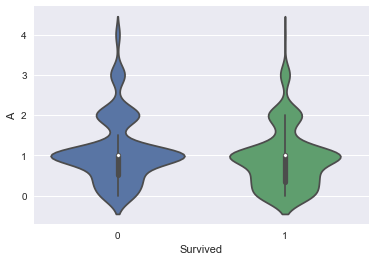

In [56]:
sns.violinplot(x = train_df['Survived'], y = train_df['A'])

In [57]:
train_df = train_df.drop('A', axis = 1)
test_df = test_df.drop('A', axis = 1)
train_df.head()
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,FamilySize,IsAlone,Age*Class,F
0,3,0,2,0,2,0,-1,0,1,1,1,6,0.000000
1,3,1,2,0,0,0,-1,0,3,2,0,6,0.000000
2,2,0,3,1,2,0,-1,0,1,1,1,6,1.000000
3,3,0,1,1,0,0,-1,0,1,1,1,3,1.000000
4,3,1,1,1,0,0,-1,0,3,3,0,3,0.333333


## Model, predict and solve

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

### Single model comparison

We first try to make the prediction using a single mode. 

In [58]:
X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)
X_train.shape, y_train.shape, X_test.shape

((712, 13), (712,), (179, 13))

In [59]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# score
from sklearn.metrics import accuracy_score

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

Note the confidence score generated by the model based on our training dataset.

In [60]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred)
acc_log

0.75977653631284914

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

- Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
- Inversely as Pclass increases, probability of Survived=1 decreases the most.
- This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
- So is Title as second highest positive correlation.

In [61]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.438955
5,Has_Cabin,0.569318
8,Title,0.520308
3,Fare,0.262469
4,Embarked,0.178313
6,Has_slash,0.013442
12,F,-0.014279
7,Ticket_len,-0.039309
11,Age*Class,-0.044335
10,IsAlone,-0.271827


The engineered feature 'Has_slash' and 'F' are not doing well. But we will whether including them will improve the performance when we do boosting. 

Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of **two categories**, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

Note that the model generates a confidence score which is higher than Logistics Regression model.

In [62]:
# Support Vector Machines

svc = SVC(degree = 3, kernel = 'rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = accuracy_score(y_test, y_pred)
acc_svc

0.79329608938547491

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference Wikipedia.
KNN confidence score is better than Logistics Regression but worse than SVM.


In [63]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred)
acc_knn

0.78770949720670391

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

The model generated confidence score is the lowest among the models evaluated so far. However, it is doing better than the Naive bayes in [\ref 3](https://www.kaggle.com/acombray/fork-of-titanic-data-science-solutions/editnb).

In [64]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = accuracy_score(y_test, y_pred)
acc_gaussian

0.74860335195530725

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time. Reference [Wikipedia](https://en.wikipedia.org/wiki/Perceptron).

In [65]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = accuracy_score(y_test, y_pred)
acc_perceptron

0.71508379888268159

In [66]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = accuracy_score(y_test, y_pred)
acc_linear_svc

0.75977653631284914

In [67]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = accuracy_score(y_test, y_pred)
acc_sgd

0.67597765363128492

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

The model confidence score is the highest among models evaluated so far.

In [68]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = accuracy_score(y_test, y_pred)
acc_decision_tree

0.79329608938547491

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.

In [69]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest = accuracy_score(y_test, y_pred)
acc_random_forest

0.82122905027932958

Model evaluation
We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

In [70]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.821229
0,Support Vector Machines,0.793296
8,Decision Tree,0.793296
1,KNN,0.787709
2,Logistic Regression,0.759777
7,Linear SVC,0.759777
4,Naive Bayes,0.748603
5,Perceptron,0.715084
6,Stochastic Gradient Decent,0.675978


### Conclusion

For a single model, the winner is clear: Random Forest. We also see that for most of the algorithms, our performance is worse than that of [Ref 2](https://www.kaggle.com/acombray/titanic-best-working-classifier/editnb) with fewer features. This is probably due to the overfitting. However, we will see if these additional features help with the boosting. 

In [71]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X, y)
y_pred = random_forest.predict(test_df)

In [72]:
importance = clf.feature_importances_
df = pd.DataFrame({'Feature':X.columns.values, 'Importance':clf.feature_importances_})
df

,Feature,Importance
0,Pclass,0.080764
1,Sex,0.201019
2,Age,0.043785
3,Fare,0.054582
4,Embarked,0.053291
5,Has_Cabin,0.052157
6,Has_slash,0.030011
7,Ticket_len,0.047385
8,Title,0.194941
9,FamilySize,0.070599


In [73]:
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": y_pred
    })

In [74]:
submission.to_csv('submssion.csv', index = False)

The score was 0.76555. The rank is almost after 3737.

## Stacking

### Stacking using XGBoost

In [75]:
import re
import xgboost as xgb


import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.cross_validation import KFold;

/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Pearson Correlation Heatmap

let us generate some correlation plots of the features to see how related one feature is to the next. To do so, we will utilise the Seaborn plotting package which allows us to plot heatmaps very conveniently as follows

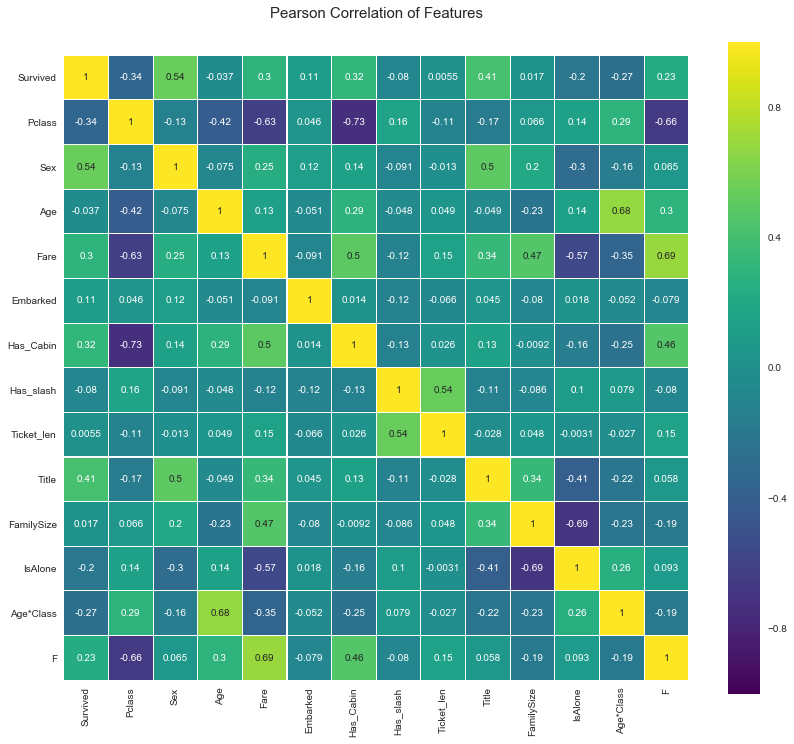

In [76]:
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

### Takeaway from the Plots

One thing that that the Pearson Correlation plot can tell us is that there are not too many features strongly correlated with one another. This is good from a point of view of feeding these features into your learning model because this means that there isn't much redundant or superfluous data in our training set and we are happy that each feature carries with it some unique information. Here are two most correlated features are that of Family size and Parch (Parents and Children). I'll still leave both features in for the purposes of this exercise.

### Pairplots

Finally let us generate some pairplots to observe the distribution of data from one feature to the other. Once again we use Seaborn to help us.

/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning:

invalid value encountered in divide

/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:32: RuntimeWarning:

invalid value encountered in double_scalars



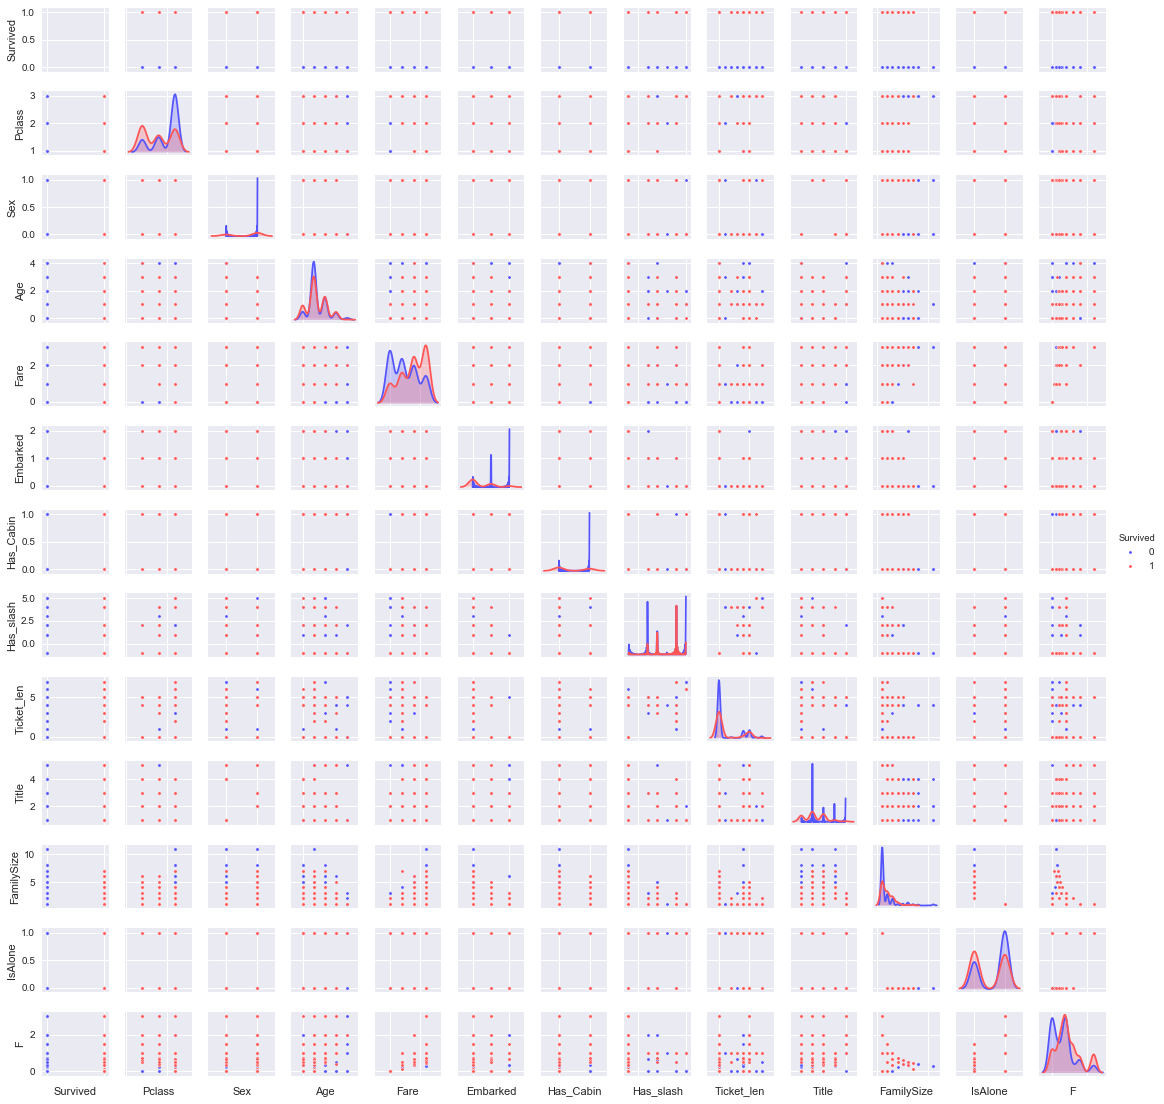

In [77]:
col = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Has_Cabin', 'Has_slash',\
       'Ticket_len', 'Title', 'FamilySize', 'IsAlone', 'F']
g = sns.pairplot(train_df[col], hue='Survived', palette = 'seismic',\
                 size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

The section of code below is from [Ref 2](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python). It is a class *SklearnHelper* that allows one to extend the inbuilt methods (such as train, predict and fit) common to all the Sklearn classifiers. Therefore this cuts out redundancy as  won't need to write the same methods five times if we wanted to invoke five different classifiers.

In [78]:
# Some useful parameters which will come in handy later on
ntrain = train_df.shape[0]
ntest = test_df.shape[0]
SEED = 43 # for reproducibility
NFOLDS = 9 # set folds for out-of-fold prediction
kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=SEED, params = {}, has_random_state = False):
        if has_random_state :
            params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, X_train, y_train):
        self.clf.fit(X_train, y_train)

    def predict(self, X):
        return self.clf.predict(X)
    
    def fit(self,X,y):
        return self.clf.fit(X,y)
    
    def feature_importances(self,X,y):
        print(self.clf.fit(X,y).feature_importances_)

### Out-of-Fold Predictions

Stacking uses predictions of base classifiers as input for training to a second-level model. However one cannot simply train the base models on the full training data, generate predictions on the full test set and then output these for the second-level training. This runs the risk of your base model predictions already having "seen" the test set and therefore overfitting when feeding these predictions.

In [79]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

## Generating our Base First-Level Models 

So now let us use the above learning models as our first level classification. These models can all be conveniently invoked via the Sklearn library and are listed as follows:
<ol>
 <li>Support Vector Machines </li>
 <li>KNN</li>
 <li>Logistic Regression</li>
 <li>Random Forest</li> 
 <li>Naive Bayes</li>
 <li>Perceptron</li>
 <li>Stochastic Gradient Decent</li>
 <li>Linear SVC</li>
 <li>Decision Tree</li>
</ol>

In [80]:
# Put in our parameters for said classifiers
# Support Vector Machines parameters
svc_params = {'degree' : 3, 'kernel' : 'rbf'}

# KNN parameters
knn_params = {'n_neighbors' : 3}

# Random Forest parameters
rf_params = {'n_estimators': 100}

Create classifying objects

In [81]:
# Create 9 objects that represent our 9 models
svc = SklearnHelper(clf=SVC, params = svc_params, has_random_state = True)
knn = SklearnHelper(clf=KNeighborsClassifier, params = knn_params)
log = SklearnHelper(clf=LogisticRegression)
rf = SklearnHelper(clf=RandomForestClassifier, params=rf_params, has_random_state = True)
nb = SklearnHelper(clf=GaussianNB)
per = SklearnHelper(clf=Perceptron)
sgd = SklearnHelper(clf=SGDClassifier)
lsvc = SklearnHelper(clf=LinearSVC)
dt = SklearnHelper(clf=DecisionTreeClassifier)

### Creating NumPy arrays out of our train and test sets

Great. Having prepared our first layer base models as such, we can now ready the training and test test data for input into our classifiers by generating NumPy arrays out of their original dataframes as follows:

In [82]:
# Create Numpy arrays of train, test and target ( Survived) dataframes to feed into our models
y_train = train_df['Survived'].ravel()
x_train = X.values # Creates an array of the train data
x_test = test_df.values # Creats an array of the test data

### Output of the First level Predictions

We now feed the training and test data into our 5 base classifiers and use the Out-of-Fold prediction function we defined earlier to generate our first level predictions. Allow a handful of minutes for the chunk of code below to run.

In [83]:
# Create our OOF train and test predictions. These base results will be used as new features
svc_oof_train, svc_oof_test = get_oof(svc, x_train, y_train, x_test)
knn_oof_train, knn_oof_test = get_oof(knn, x_train, y_train, x_test)
log_oof_train, log_oof_test = get_oof(log, x_train, y_train, x_test)
rf_oof_train, rf_oof_test = get_oof(rf, x_train, y_train, x_test)
nb_oof_train, nb_oof_test = get_oof(nb, x_train, y_train, x_test)
per_oof_train, per_oof_test = get_oof(per, x_train, y_train, x_test)
sgd_oof_train, sgd_oof_test = get_oof(sgd, x_train, y_train, x_test)
lsvc_oof_train, lsvc_oof_test = get_oof(lsvc, x_train, y_train, x_test)
dt_oof_train, dt_oof_test = get_oof(dt, x_train, y_train, x_test)

print("Training is complete")

Training is complete


## Second-level predictions from the first-level output
### First-level output as new features

Having now obtained our first-level predictions, one can think of it as essentially building a new set of features to be used as training data for the next classifier. As per the code below, we are therefore having as our new columns the first-level predictions from our earlier classifiers and we train the next classifier on this.

In [84]:
base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
                                        'SVC' : svc_oof_train.ravel(),
                                        'KNN' : knn_oof_train.ravel(),
                                        'LogReg' : log_oof_train.ravel(),
                                        'NaiveBayes' : nb_oof_train.ravel(),
                                        'Perceptron' : per_oof_train.ravel(),
                                        'SGD' : sgd_oof_train.ravel(),
                                        'LinearSVC' : lsvc_oof_train.ravel(),
                                        'DecisionTree' : dt_oof_train.ravel()})
base_predictions_train.head()

,DecisionTree,KNN,LinearSVC,LogReg,NaiveBayes,Perceptron,RandomForest,SGD,SVC
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Correlation Heatmap of the Second Level Training set**

In [85]:
data = [
    go.Heatmap(
        z= base_predictions_train.astype(float).corr().values ,
        x=base_predictions_train.columns.values,
        y= base_predictions_train.columns.values,
          colorscale='Viridis',
            showscale=True,
            reversescale = True
    )
]
py.iplot(data, filename='labelled-heatmap')

There have been quite a few articles and Kaggle competition winner stories about the merits of having trained models that are more uncorrelated with one another producing better scores.

In [86]:
x_train = np.concatenate(( svc_oof_train, knn_oof_train, log_oof_train, rf_oof_train, \
                          nb_oof_train, per_oof_train, sgd_oof_train, lsvc_oof_train, dt_oof_train), axis=1)
x_test = np.concatenate(( svc_oof_test, knn_oof_test, log_oof_test, rf_oof_test, \
                          nb_oof_test, per_oof_test, sgd_oof_test, lsvc_oof_test, dt_oof_test), axis=1)

Having now concatenated and joined both the first-level train and test predictions as x_train and x_test, we can now fit a second-level learning model.

### Second level learning model via XGBoost

Here we choose the eXtremely famous library for boosted tree learning model, XGBoost. It was built to optimize large-scale boosted tree algorithms. For further information about the algorithm, check out the [official documentation][1].

  [1]: https://xgboost.readthedocs.io/en/latest/

Anyways, we call an XGBClassifier and fit it to the first-level train and target data and use the learned model to predict the test data as follows:

In [87]:
gbm = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(x_train, y_train)
predictions = gbm.predict(x_test)

### Producing the Submission file again

In [88]:
# Generate Submission File 
StackingSubmission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': predictions })
StackingSubmission.to_csv("StackingSubmission.csv", index=False)

The new score is 0.78468 and the rank is advanced to 2823. This is a good improvement.

We can compare the two predictions

In [89]:
compare_df = pd.merge(submission, StackingSubmission, on = 'PassengerId')
compare_df.head()

,PassengerId,Survived_x,Survived_y
0,892,0,0
1,893,1,0
2,894,0,0
3,895,0,0
4,896,1,1


In [90]:
compare_df['Difference'] = compare_df['Survived_x'] != compare_df['Survived_y']
compare_df.head()

,PassengerId,Survived_x,Survived_y,Difference
0,892,0,0,False
1,893,1,0,True
2,894,0,0,False
3,895,0,0,False
4,896,1,1,False


In [91]:
count = len(compare_df[compare_df['Difference']])
ratio = count/float(418)
print ratio

0.0861244019139


This is a significant portion of difference.

## References

This notebook has been created based on great work done solving the Titanic competition and other sources.

<ul>
  <li> 
  <a href = "https://www.kaggle.com/startupsci/titanic-data-science-solutions">Titanitc Data Science Solutions</a>
  </li>
  <li> 
  <a href = "https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python">Introduction to Ensembling/Stacking in Pyth 238427</a>
  </li>
  <li>
  <a href = "https://www.kaggle.com/sinakhorami/titanic-best-working-classifier">Titanic best working classifier</a>
  </li>
  <li>
  <a href = "https://www.kaggle.com/omarelgabry/a-journey-through-titanic">A Journey through Titanic</a>
  </li>
</ul>
